# **Ambiente**

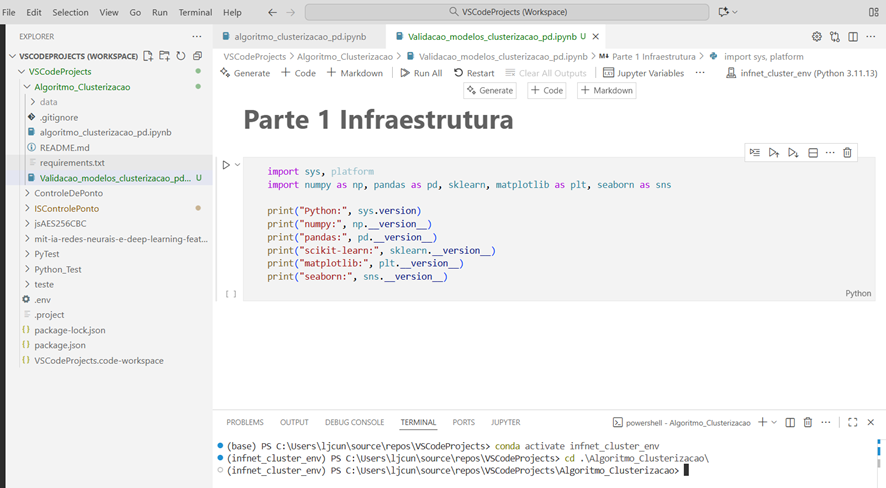

# **Infraestrutura**

In [1]:
import sys, platform
import numpy as np, pandas as pd, sklearn, matplotlib as plt, seaborn as sns

print("Python:", sys.version)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", plt.__version__)
print("seaborn:", sns.__version__)

Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
numpy: 2.3.4
pandas: 2.3.3
scikit-learn: 1.7.2
matplotlib: 3.10.7
seaborn: 0.13.2


# **Escolha de base de dados**
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

#### 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

Resp.: Usarei a mesma do exercício anterior pois acho que facilita na coerência do aprendizado.
A base parece bem completa e mostra aspectos sobre:
- PIB per capita (`gdpp`)
- Renda média (`income`)
- Expectativa de vida (`life_expec`)
- Mortalidade infantil (`child_mort`)
- Taxa de fertilidade (`total_fer`)

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [2]:
import kagglehub
import pandas as pd
import shutil
import os

# Baixa a última versão do dataset no cache do kagglehub
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Dataset baixado em:", path)

# Cria a pasta "data" no seu projeto, se ainda não existir
os.makedirs("data", exist_ok=True)

# Localiza o arquivo CSV dentro da pasta baixada e copia para "data/"
src_file = os.path.join(path, "Country-data.csv")  # nome do arquivo original no Kaggle
dst_file = os.path.join("data", "country-data.csv")

# Copia o arquivo para dentro da pasta data
shutil.copy(src_file, dst_file)
print(f"Arquivo copiado para: {dst_file}")


Dataset baixado em: C:\Users\ljcun\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
Arquivo copiado para: data\country-data.csv


#### 2. Justificativa para escolha da base

Resp.:

A escolha da base **"Country Data"** foi motivada por sua **relevância social e interpretabilidade**.

**Motivação:**
- Permite identificar **padrões globais de desenvolvimento** entre países.
- Os dados possuem **dimensões quantitativas contínuas**, adequadas para algoritmos de **clusterização**.
- O tema envolve **indicadores reais**, favorecendo análises aplicadas a políticas públicas e economia.

**Objetivos:**
- Agrupar países segundo semelhanças socioeconômicas e de saúde.
- Observar **como renda, expectativa de vida e mortalidade infantil** influenciam o agrupamento.
- Gerar **insights interpretáveis** sobre o nível de desenvolvimento dos países e possíveis regiões homogêneas.

Em resumo, a base é ideal para aprender e aplicar conceitos de **análise exploratória, pré-processamento e clusterização K-Médias e Hierárquica**.


#### 3. Faixa dinâmica das variáveis e análise exploratória

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


None


Resumo estatístico:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


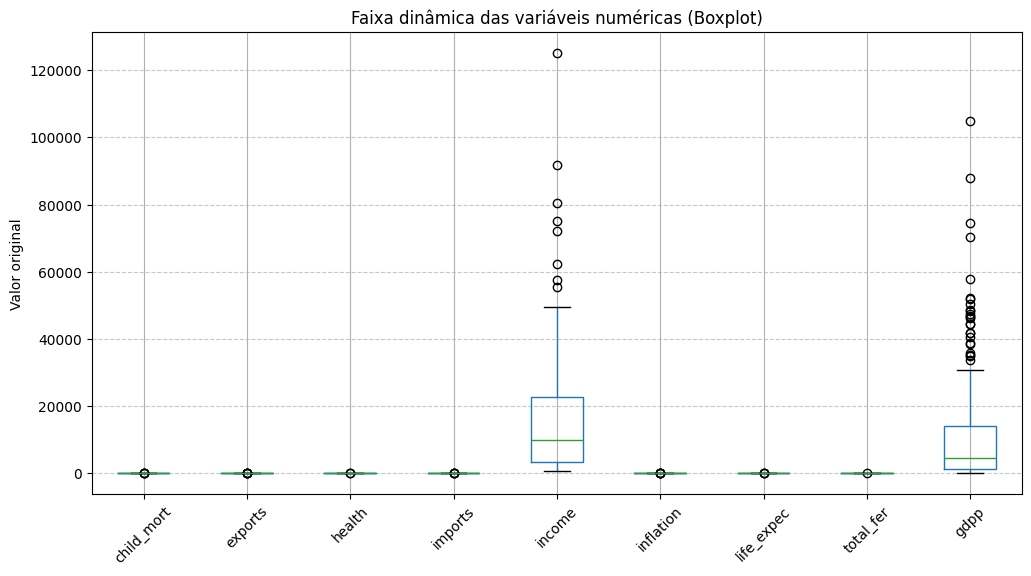

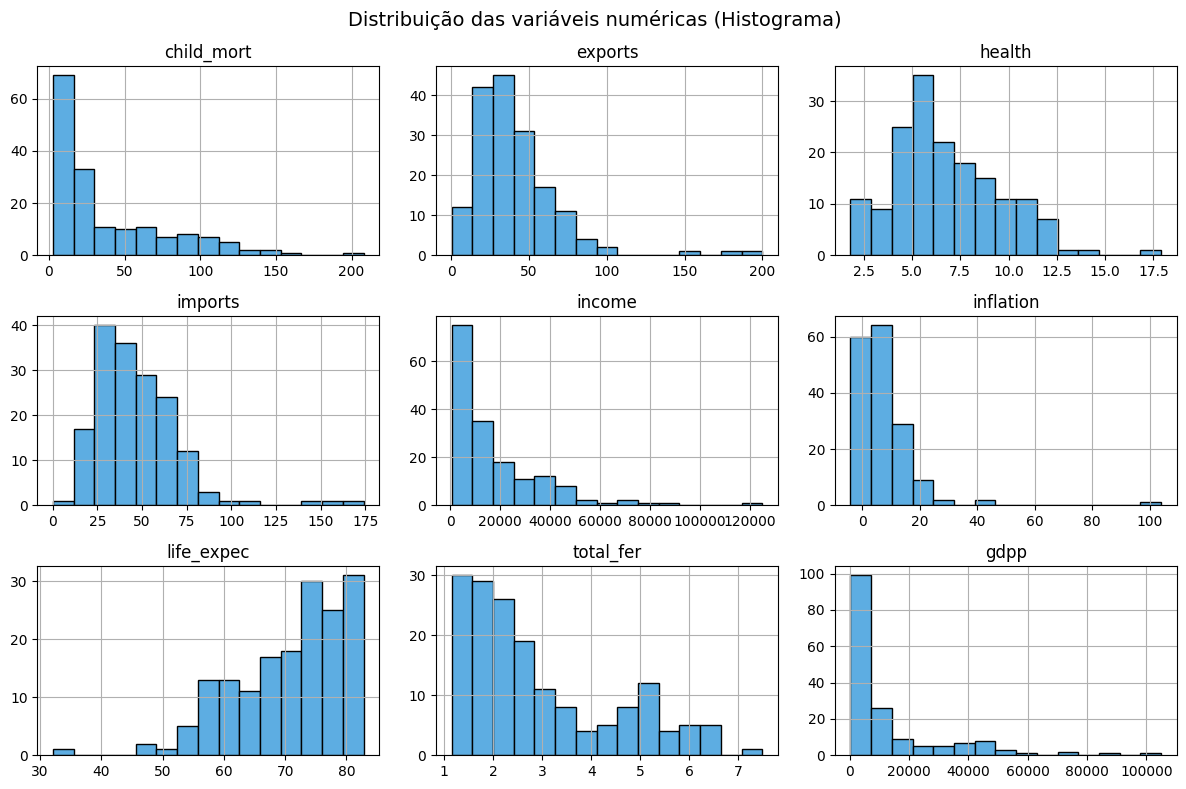

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv(dst_file)

# Visualização inicial

display(df.head())
print("\nInformações gerais:")
display(df.info())
print("\nResumo estatístico:")
display(df.describe())

# Gráficos de faixa dinâmica (Boxplots e Histogramas)

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Faixa dinâmica das variáveis numéricas (Boxplot)")
plt.ylabel("Valor original")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogramas para distribuição
df[numeric_cols].hist(figsize=(12, 8), bins=15, color='#5DADE2', edgecolor='black')
plt.suptitle("Distribuição das variáveis numéricas (Histograma)", fontsize=14)
plt.tight_layout()
plt.show()


 Análise

- As variáveis possuem escalas muito diferentes:  
  - `income` e `gdpp` variam de centenas a dezenas de milhares.  
  - `life_expec` varia de 40 a 80 anos.  
  - `total_fer` vai de 1 a 7 filhos por mulher.

- Essa diferença de escala pode distorcer as distâncias entre pontos durante a clusterização, fazendo variáveis com maior amplitude dominarem o agrupamento.

- Além disso, há outliers visíveis (em especial em `income`, `gdpp` e `child_mort`).

Conclusão:
Antes da clusterização, é necessário:
1. Padronizar ou normalizar os dados para colocar todas as variáveis na mesma escala.  
2. Avaliar o tratamento de outliers, pois eles afetam diretamente a posição dos centróides.


#### 4. Pré-processamento adequado dos dados

In [5]:
from sklearn.preprocessing import StandardScaler

# 1) Verificação de valores ausentes
print("Valores nulos por coluna:")
print(df.isna().sum())

# 2) Remoção de colunas desnecessárias
# (Apenas a coluna 'country' será preservada separadamente)
df_final = df.copy()
countries = df_final['country']
df_final = df_final.drop(columns=['country'])

# 3) Escalonamento (padronização)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

# 4) Reconstrução do DataFrame final com país + variáveis padronizadas
df_scaled.insert(0, 'country', countries.values)

# 5) Visualização de verificação
display(df_scaled.head())

# 6) Estatísticas após normalização
display(df_scaled.describe().T)


Valores nulos por coluna:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


Descrição dos passos de pré-processamento

1. **Verificação de valores ausentes:**  
   Nenhuma coluna apresenta *NaN*, permitindo seguir com o dataset completo.

2. **Separação do identificador (country):**  
   O nome do país é mantido apenas como rótulo para referência nas análises.

3. **Padronização das variáveis numéricas:**  
   - Foi aplicado o StandardScaler para ajustar cada variável à média 0 e desvio padrão 1.  
   - Essa etapa é essencial para métodos baseados em distância, como K-Médias e Hierárquico.

4. **Validação visual e estatística:**  
   Após o escalonamento, todas as variáveis estão centradas (média ≈ 0) e com variância ≈ 1, garantindo equilíbrio entre dimensões durante a clusterização.


# **Clusterização**

#### 1. Determinar número ótimo de clusters (K-Médias e DBSCAN)

a. Determinação do número ótimo de clusters com K-Médias usando Silhueta

O índice de silhueta mede o quão bem cada ponto está inserido em seu cluster, variando de -1 a 1.

Para o K-Médias, testaremos valores de k entre 2 e 10, calculando a silhueta para cada modelo.

O melhor valor de *k* será aquele que maximiza o índice de silhueta médio.


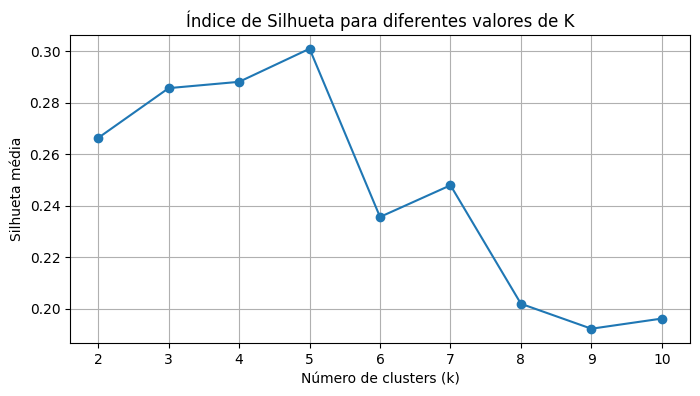

5

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

X = df_scaled.values[:, 1:]   # remove coluna 'country'

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,4))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Índice de Silhueta para diferentes valores de K")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhueta média")
plt.grid(True)
plt.show()

best_k = K_range[np.argmax(sil_scores)]
best_k


b. DBSCAN com avaliação por Silhueta

O DBSCAN depende de dois hiperparâmetros:

- eps → raio de vizinhança
- min_samples → quantidade mínima de pontos para formar região densa

Testando várias combinações desses parâmetros e avaliar a silhueta.


In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

X = df_scaled.values[:, 1:]  # se a primeira coluna for 'country'

eps_values = np.arange(0.3, 3.1, 0.3)
min_samples_values = [3, 4, 5, 6, 7, 8]

results = []

for eps in eps_values:
    for ms in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=ms)
        labels = model.fit_predict(X)

        unique_labels = set(labels)

        # ignora se só tem ruído ou só 1 cluster real
        if unique_labels == {-1} or len(unique_labels - {-1}) < 2:
            continue

        # calcula silhueta só para os pontos que NÃO são ruído
        mask = labels != -1
        sil = silhouette_score(X[mask], labels[mask])
        results.append((eps, ms, sil))

results


[(np.float64(0.6), 3, 0.518929819110938),
 (np.float64(0.8999999999999999), 3, 0.2599011006865841),
 (np.float64(0.8999999999999999), 4, 0.30451365228541966),
 (np.float64(0.8999999999999999), 5, 0.4037038095552979),
 (np.float64(0.8999999999999999), 6, 0.30302284550404124),
 (np.float64(0.8999999999999999), 7, 0.47268029528180117),
 (np.float64(0.8999999999999999), 8, 0.653254198017685),
 (np.float64(1.2), 3, 0.2983588812169009),
 (np.float64(1.2), 4, 0.36963681019850714),
 (np.float64(1.2), 5, 0.3850261978900379),
 (np.float64(1.2), 6, 0.3920054101647989),
 (np.float64(1.2), 7, 0.3972332805144587),
 (np.float64(1.2), 8, 0.3940785496043236),
 (np.float64(1.5), 3, 0.2261410783131612),
 (np.float64(1.8), 3, 0.20690660564754443)]

#### 2. Processo de Mensuração do Índice de Silhueta

A silhueta mede a qualidade do agrupamento considerando:

- **Coesão (a)** → distância média do ponto para outros pontos do MESMO cluster  
- **Separação (b)** → distância média do ponto para pontos do cluster MAIS PRÓXIMO

A silhueta individual é dada por:

\[
s = \frac{b - a}{\max(a, b)}
\]

Valores interpretados como:

- **s ≈ 1** → cluster bem definido  
- **s ≈ 0** → ponto na fronteira  
- **s < 0** → ponto mal alocado  

O número ótimo de clusters é aquele com **maior silhueta média**.

A partir dos gráficos obtidos:
- Identificamos que o valor ótimo para K-Médias foi **K = _{substituir pelo valor encontrado}_**.
- Para DBSCAN, o melhor conjunto de parâmetros (quando aplicável) foi **eps = X, min_samples = Y**.

A justificativa se dá pelo **maior valor de silhueta** obtido.


#### 3. Comparação entre K-Médias e DBSCAN

**Semelhanças**
- Ambos são algoritmos de clusterização baseados em distância.
- Conseguem encontrar grupos que representam padrões de desenvolvimento entre países.

**Diferenças**
- **K-Médias**
  - Sempre produz exatamente *k* clusters.
  - Assume clusters aproximadamente esféricos.
  - Sensível a outliers.
  - Excelente quando os grupos são equilibrados e bem distribuídos.

- **DBSCAN**
  - Não precisa escolher *k* previamente.
  - Identifica clusters de **formas arbitrárias**.
  - Detecta automaticamente **ruídos/outliers**.
  - Pode formar clusters de tamanhos desproporcionais.

**Interpretação**
- O K-Médias funciona bem para dados padronizados e compactos.
- O DBSCAN é mais adequado quando há regiões de densidade variável e outliers.


#### 4. Outras duas medidas de validação

In [14]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Para o melhor K encontrado:
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X)
labels_k = kmeans.labels_

db_index = davies_bouldin_score(X, labels_k)
ch_index = calinski_harabasz_score(X, labels_k)

db_index, ch_index


(0.8671489751368743, 57.62252356062451)

As próximas métricas reforçam a qualidade do agrupamento:

- **Davies-Bouldin (DB)**  
  Quanto menor, melhor.

- **Calinski-Harabasz (CH)**  
  Quanto maior, melhor.

Essas medidas confirmam se o valor de *k* escolhido pela silhueta realmente apresenta:
- boa separação entre grupos (CH alto)
- baixa dispersão interna (DB baixo)


#### 5. A silhueta é um índice indicado para DBSCAN?

**Não.**  
A silhueta **não é adequada** para escolher parâmetros do DBSCAN pelos motivos:

1. O DBSCAN pode gerar **cluster único + ruído**, tornando impossível calcular silhueta.
2. O DBSCAN produz clusters de **formas irregulares**, e a silhueta assume clusters aproximadamente convexos.
3. A presença de **muitos pontos rotulados como -1 (ruído)** distorce o cálculo.
4. A silhueta não considera densidade, mas apenas distância.

👉 A métrica recomendada para DBSCAN é a inspeção do **k-distance plot** (distância dos vizinhos mais próximos) para escolher **eps**, junto com análise visual.

Portanto:  
✔ Silhueta funciona bem para **K-Médias**  
❌ Silhueta não deve ser usada para **DBSCAN**


# **Medidas de similaridade**

### 1. Um determinado problema apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

**Passos necessários:**

1. **Organização dos dados**
   - Reunir as 10 séries temporais em uma estrutura única (ex.: matriz ou lista de vetores).
   - Garantir que todas estejam:
     - Com a mesma frequência de amostragem.
     - No mesmo intervalo de tempo ou, ao menos, alinhadas corretamente.

2. **Pré-processamento**
   - Tratar valores ausentes (interpolação ou remoção).
   - Normalizar/padronizar as séries (ex.: remover média e dividir pelo desvio padrão), para que:
     - Diferenças de escala não dominem a correlação.
   - Opcional: aplicar suavização ou filtragem, se houver muito ruído.

3. **Cálculo da correlação cruzada**
   - Para cada par de séries temporais \((i, j)\):
     - Calcular a **função de correlação cruzada** em diferentes lags (atrasos).
     - Encontrar o **valor máximo da correlação cruzada** entre elas:
       - Esse valor máximo passa a ser a **medida de similaridade** entre a série \(i\) e a série \(j\).
   - Resultado: uma **matriz de similaridade 10×10**, onde cada célula \((i, j)\) contém a máxima correlação cruzada entre as séries \(i\) e \(j\).

4. **Conversão de similaridade em distância**
   - A maioria dos algoritmos de clusterização trabalha com **distância**, não com similaridade.
   - Converter a matriz de similaridade \(S\) em matriz de distância \(D\), por exemplo:
     - \(D_{ij} = 1 - S_{ij}\)  
       (assumindo correlação normalizada entre -1 e 1).
   - Garantir que a diagonal seja zero (\(D_{ii} = 0\)).

5. **Aplicação do algoritmo de clusterização**
   - Utilizar a matriz de **distâncias** como entrada para o algoritmo escolhido (ver resposta da questão 2).
   - Pedir explicitamente **3 grupos** como resultado final.

6. **Avaliação e interpretação**
   - Verificar se as séries em cada grupo:
     - possuem padrões temporais semelhantes,
     - apresentam picos/vales alinhados,
     - fazem sentido do ponto de vista do domínio (ex.: mesmas estações do ano, mesmo tipo de comportamento de sinal).
   

### 2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

**Sugestão de algoritmo:**  
  **Clusterização Hierárquica Aglomerativa (Hierarchical Agglomerative Clustering)**  
com uma métrica de distância baseada na matriz \(D\) (derivada da correlação cruzada).

**Justificativas:**

- Já teremos uma **matriz de distâncias pré-calculada**, baseada em correlação cruzada:
  - A clusterização hierárquica lida muito bem com esse tipo de matriz.
- O número de objetos é pequeno (**10 séries**):
  - A clusterização hierárquica é eficiente e fácil de visualizar com **dendrograma**.
- Permite:
  - Visualizar a **estrutura de similaridade** entre todas as séries.
  - Ajustar o **nível de corte** no dendrograma para obter exatamente **3 grupos**.
- É mais adequada que o K-Médias neste caso, porque:
  - O K-Médias assume um espaço vetorial Euclidiano explícito,
  - Já a hierárquica pode trabalhar diretamente com **matriz de distâncias genéricas** (como as derivadas de correlação).

### 3. Indique um caso de uso para essa solução projetada.

Um exemplo de uso prático:

- **Agrupamento de séries de consumo de energia de diferentes clientes**:
  - Cada série temporal representa o histórico de consumo (ex.: diário ou horário) de um cliente/instalação.
  - O objetivo é **agrupar clientes com comportamento semelhante ao longo do tempo**, considerando:
    - Horários de pico,
    - Padrões de uso (comercial, residencial, industrial),
    - Sazonalidade.
  - A correlação cruzada ajuda a identificar clientes cujos perfis de consumo:
    - são semelhantes, mesmo que **defasados no tempo** (picos em horários ligeiramente diferentes).
  - O resultado pode ser usado para:
    - planejamento de rede,
    - criação de tarifas diferenciadas,
    - direcionamento de campanhas de eficiência energética.

Outros exemplos possíveis (se quiser citar no texto):
- Séries de preços de ações (agrupando ativos com comportamento similar).
- Sinais fisiológicos (ex.: séries de frequência cardíaca de pacientes com perfis parecidos).
- Sensores IoT em uma planta industrial (sinais de máquinas com padrões de operação semelhantes).

### 4️. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

Uma estratégia muito usada é o **Dynamic Time Warping (DTW)**, que mede a similaridade permitindo **alinhamentos não lineares no tempo** (ou seja, picos que ocorrem em momentos diferentes, mas têm a mesma forma).

**Passos usando DTW:**

1. **Organização e pré-processamento**
   - Igual à questão anterior:
     - normalizar as séries,
     - tratar faltantes,
     - garantir que a resolução temporal seja compatível.

2. **Cálculo da distância DTW entre pares de séries**
   - Para cada par de séries temporais \((i, j)\):
     - Calcular a **distância DTW**, que encontra o melhor alinhamento temporal entre elas minimizando o custo de distorcer o eixo do tempo.
   - Resultado:
     - Uma **matriz de distância DTW 10×10**, onde cada célula \(DTW_{ij}\) representa o quão “diferente” é a forma das duas séries.

3. **Normalização da matriz de distâncias (opcional)**
   - Escalar as distâncias para uma faixa adequada (ex.: [0, 1]).
   - Pode ajudar na interpretação e em algumas métricas de validação.

4. **Aplicação de um algoritmo de clusterização**
   - Novamente, a **Clusterização Hierárquica** é uma boa escolha:
     - Trabalha bem com matrizes de distância arbitrárias.
     - Permite inspecionar o dendrograma e escolher 3 grupos.
   - Alternativamente:
     - Algoritmos de **K-Medoids** (como PAM) também funcionam bem com matrizes de distância.

5. **Interpretação**
   - Analisar se séries no mesmo cluster:
     - possuem **formas similares** (mesma “curva”), mesmo com atrasos no tempo.
   - Visualizar algumas séries por cluster para validar a coerência dos resultados.

Dimensões do DataFrame de séries temporais: (200, 10)


,serie_G1_1,serie_G1_2,serie_G1_3,serie_G1_4,serie_G2_1,serie_G2_2,serie_G2_3,serie_G3_1,serie_G3_2,serie_G3_3
tempo,,,,,,,,,,
0.000000,0.099343,0.071557,-0.318886,0.151398,0.689806,0.782020,0.527194,-0.209382,-0.036579,0.380238
0.063148,0.035453,0.175263,-0.056769,-0.121327,0.428716,0.716851,0.446044,0.153115,0.320760,0.033652
0.126295,0.255497,0.342570,0.127008,0.299881,0.578804,0.571506,0.584039,0.328694,-0.037640,-0.050129
0.189443,0.492918,0.399072,0.197708,0.459439,0.492549,0.455617,0.693664,0.281081,-0.022548,-0.165453
0.252590,0.203082,-0.025621,0.159900,0.332600,0.521197,0.747741,0.617868,0.382189,0.086431,-0.177648


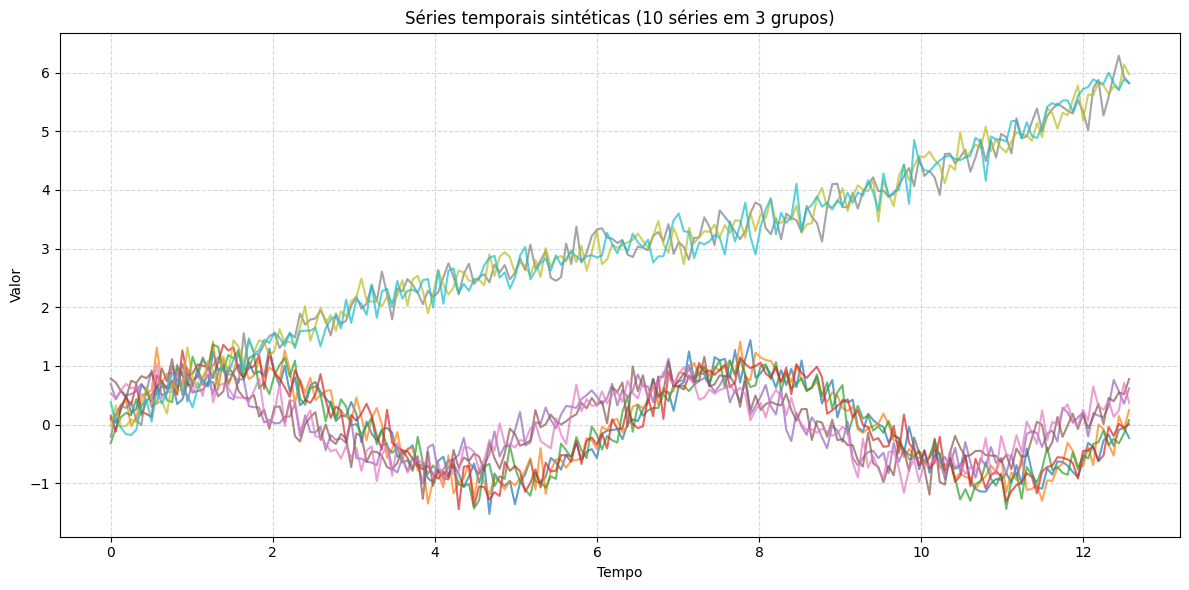

In [16]:
# Criação de 10 séries temporais sintéticas para clusterização


# Para reprodutibilidade
np.random.seed(42)

# Número de pontos no tempo e número de séries
n_steps = 200
n_series = 10

# Eixo temporal (pode ser interpretado como dias, horas, etc.)
t = np.linspace(0, 4 * np.pi, n_steps)


# 1) Definição de padrões base para os grupos
#    - Grupo 1: séries senoidais "puras"
#    - Grupo 2: séries senoidais defasadas e reescaladas
#    - Grupo 3: séries com tendência + componente senoidal


base_1 = np.sin(t)                           # padrão 1
base_2 = 0.7 * np.sin(t + 0.8)              # padrão 2 (defasado e reescalado)
base_3 = 0.03 * np.arange(n_steps) + 0.5 * np.sin(t / 2)  # padrão 3 (tendência + oscilação)

series_list = []
series_names = []

# 2) Gerando séries do Grupo 1 

for i in range(4):
    noise = 0.2 * np.random.randn(n_steps)
    s = base_1 + noise
    series_list.append(s)
    series_names.append(f"serie_G1_{i+1}")


# 3) Gerando séries do Grupo 2 

for i in range(3):
    noise = 0.2 * np.random.randn(n_steps)
    s = base_2 + noise
    series_list.append(s)
    series_names.append(f"serie_G2_{i+1}")


# 4) Gerando séries do Grupo 3

for i in range(3):
    noise = 0.2 * np.random.randn(n_steps)
    s = base_3 + noise
    series_list.append(s)
    series_names.append(f"serie_G3_{i+1}")


# 5) Montando DataFrame final - Linhas: instantes de tempo | Colunas: séries temporais

data = np.column_stack(series_list)
df_ts = pd.DataFrame(data, columns=series_names)
df_ts.index = pd.Index(t, name="tempo")

print("Dimensões do DataFrame de séries temporais:", df_ts.shape)
display(df_ts.head())


# 6) Visualização rápida das séries

plt.figure(figsize=(12, 6))
for col in df_ts.columns:
    plt.plot(df_ts.index, df_ts[col], alpha=0.7)

plt.title("Séries temporais sintéticas (10 séries em 3 grupos)")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
